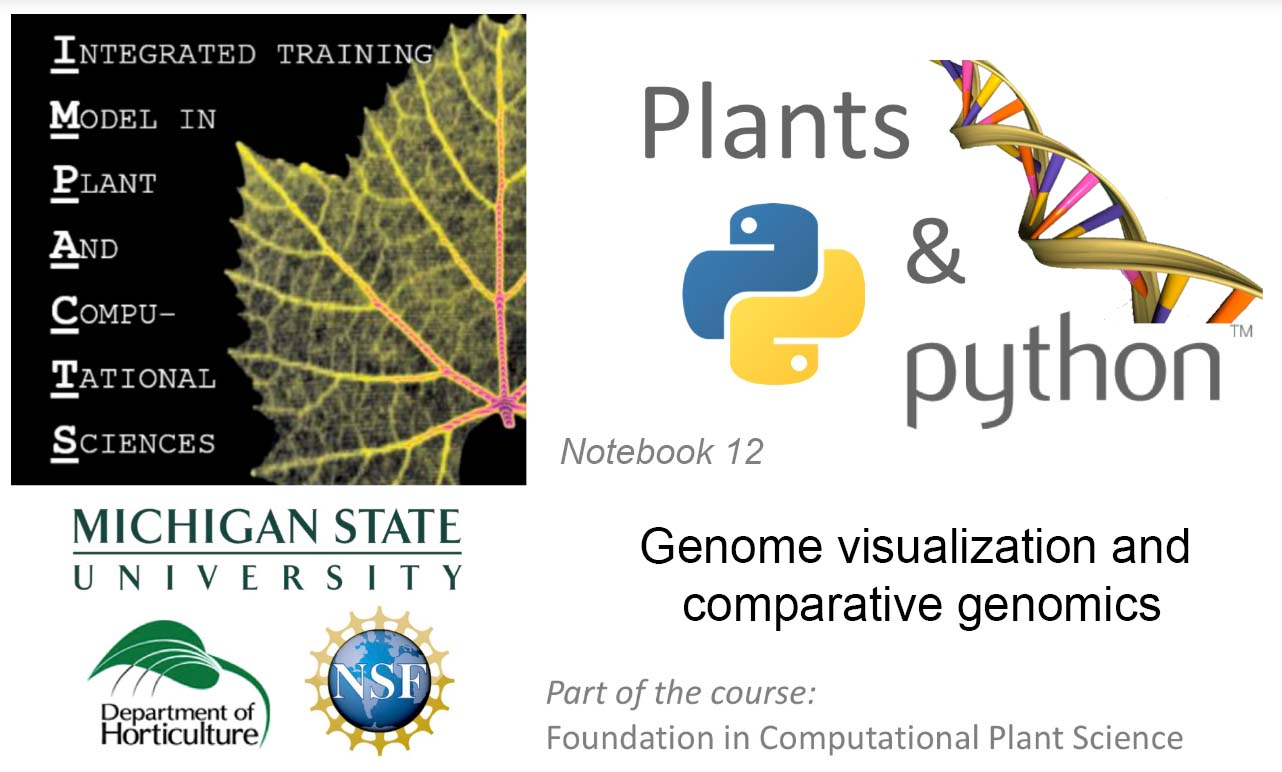

# Genome visualization and comparative genomics

Now that we've assembled a reference genome, we need to parse out the biologically meaningful sequences. These include genes, small RNAs, regulatory elements (i.e. promoters, enhancers, conserved non-coding sequences), repetitive elements, and structural repeats (e.g. centromere satelites, telomeres). **Annotation** refers to the identification of these biologically relevent sequences. Genomes are generally poorly annotated, and we have still haven't correctly identified all of the genes and important sequences in even the most heavily researched species like humans, fruit flies, and Arabidopsis. Genome annotations are constantly changing, and the addition and subtraction of genes between genomes is HUGELY frustrating. We could spend a whole course on genome annotation, but this is probably beyond the interest of everyone in class! <br>
The most widely tool to run genome annotation is the MAKER pipeline. If you are interested in MAKER, Kevin Childs (in Plant Biology at MSU) is one of the developers and they put together a nice tutorial for running MAKER on HPCC: 
http://bioinformatics.plantbiology.msu.edu/display/BIOIN/MAKER
<br>
Repetitive elements vary wildly between species but genes tend to be pretty highly conserved in both content and order along chromosomes. Still, new genes arise all the time via gene or genome duplication and differences in gene content usually drive the evolution of new traits between species. In this notebook, we will explore the evolution of genome architecture across species. We will also introduce the concept of phlylogenetics and compare gene content differences across diverse plant lineages. 

___

   # Visualizing and formatting genome features

A genome is simply a combination of A T C and Gs. You can technically open up a genome fasta file in a text editor or terminal, but humans are generally unable to identify meaningful sequences by eye alone. We can utilize genome browsers to move around the genome and view various 'tracks' of biological features (genes, repeats, variants, etc.). Genome annotation features can be stored in various tab or comma delineated formats but there are two you are likely to encounter (gff3 and BED). If you are unlikely to encounter these in your research, please feel free to skip ahead! 

The **BED** format consists of one line per feature, each containing 3-12 columns of data, plus optional track definition lines.
<br>
The first three fields in each feature line are required:
<br>
1. `chrom` - name of the chromosome or scaffold. Any valid seq_region_name can be used, and chromosome names can be given with or without the 'chr' prefix.
2. `chromStart` - Start position of the feature in standard chromosomal coordinates (i.e. first base is 0).
3. `chromEnd` - End position of the feature in standard chromosomal coordinates
<br>
Here is an example of the simples bed file:

         chr1  213941196  213942363
         chr1  213942363  213943530
         chr1  213943530  213944697
         chr2  158364697  158365864
         chr2  158365864  158367031
         chr3  127477031  127478198
         chr3  127478198  127479365
         chr3  127479365  127480532
         chr3  127480532  127481699


The **GFF** (General Feature Format) format consists of one line per feature, each containing 9 columns of data, plus optional track definition lines. 
<br>
Nine fields are required for each feature:
1. `seqid` - name of the chromosome or scaffold; chromosome names can be given with or without the 'chr' prefix. Important note: the seq ID must be one used within Ensembl, i.e. a standard chromosome name or an Ensembl identifier such as a scaffold ID, without any additional content such as species or assembly. See the example GFF output below.
2. `source` - name of the program that generated this feature, or the data source (database or project name)
3. `type` - type of feature. Must be a term or accession from the SOFA sequence ontology
4. `start` - Start position of the feature, with sequence numbering starting at 1.
5. `end` - End position of the feature, with sequence numbering starting at 1.
6. `score` - A floating point value.
7. `strand` - defined as + (forward) or - (reverse).
9. `phase` - One of '0', '1' or '2'. '0' indicates that the first base of the feature is the first base of a codon, '1' that the second base is the first base of a codon, and so on..
9. `attributes` - A semicolon-separated list of tag-value pairs, providing additional information about each feature. Some of these tags are predefined, e.g. ID, Name, Alias, Parent - see the GFF documentation for more details.

Here is an example of a gff file:

        ##gff-version 3
        ctg123 . mRNA            1300  9000  .  +  .  ID=mrna0001;Name=sonichedgehog
        ctg123 . exon            1300  1500  .  +  .  ID=exon00001;Parent=mrna0001
        ctg123 . exon            1050  1500  .  +  .  ID=exon00002;Parent=mrna0001
        ctg123 . exon            3000  3902  .  +  .  ID=exon00003;Parent=mrna0001
        ctg123 . exon            5000  5500  .  +  .  ID=exon00004;Parent=mrna0001
        ctg123 . exon            7000  9000  .  +  .  ID=exon00005;Parent=mrna0001



A genome browser is a useful way to scroll through biologically meaningful regions within a genome. There are many examples with nice GUIs, but here is one from maize: 
<br>
https://www.maizegdb.org/gbrowse/maize_v4
<br>
Notice, how many layers can be stacked together!

___

# Comparative Genomics

Plant genomes are generally collinear, with similar gene content and gene order along their chromosomes, and most conserved genes have the same function across species. We can use this property to infer the function of a new gene from a non-model species based on molecular and genetic characterization of that same gene in a model species. We can also compare two genomes and identify differences between them that might be driving unique or important traits such as stress tolerance, disease resistance, yield, taste, and metabolite biosynthesis (among many others). Some genes can have hundreds of copies across the genome, and we can use their relative position to infer which genes are orthologous and have (likely) conserved function and which genes are not orthologous. **Synteny** refers to the physical co-localization of gene blocks in corresponding chromosome regions between two species. Below is an example from several grass genomes: 
<br>
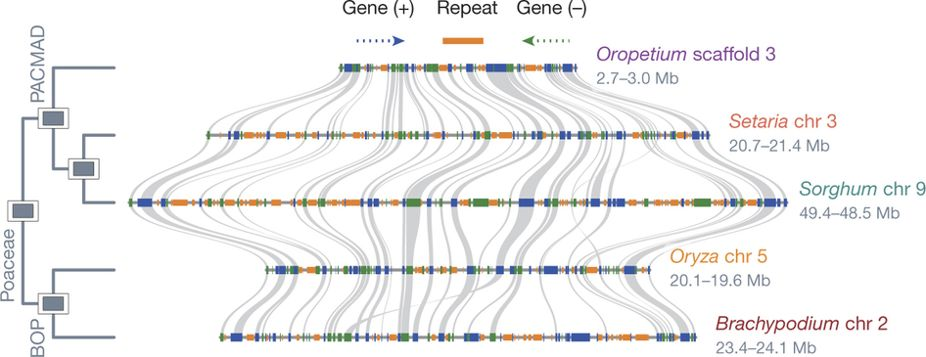
<br> 
Here, individual genes are shown in blue and green (for forward and reverse orientation) and syntenic gene pairs (i.e. conserved genes) are connected by gray lines. Notice how most genes in the grass genomes are conserved, but each species has its own unique genes not shared by others. Some of these species-specific genes are real, but others are probably not. Again, biology is inherently sloppy, and we have trouble figuring out which genes are real and which aren't. Some sequences _look like genes_ but aren't and others look like random garbage but are actually functional. Also, dead genes can come back to life. Also, also, 'real' is relative here. 
<br>
We can identify syntenic orthologs by aligning the genes from one species to another using BLAST or lastal, and filtering the output to only genes that are found in similarly ordered blocks along a chromosome. My favorite tool to do these analyses is MCscan:
https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)
<br>
The python version of MCsan is tricky to run in HPCC (because of a LaTeX issue of all things), but we can implement MCscan in CoGe: 
<br>
https://genomevolution.org/coge/SynMap.pl
<br>
Here, we can compare any two genomes and identify macro and microsyntenic differences. Genomes that are closer together phylogenetically typically produce better results, but you can compare the genomes of any two plant species and get reasonably good synteny patterns! Good examples would include sorghum vs maize (_Sorghum bicolor_ id331 vs _Zea mays_ id333), strawberry vs raspberry (_Fragaria vesca_ id34820 vs _Rubus occidentalis_ id39823), and broccoli vs cabbage (_Brassica oleracea_ id39933 vs _Brassica rapa_ id40947). You could also get a little crazy and compare pineapple vs Asparagus, orange vs bamboo, or pepper vs rice. You can also compare two different versions of the same genome to look for differences/improvements. It's best to compare well assembled, chromosome scale genomes to get better results. Genomes with ~10,000 contigs are heavily fragmented and not pretty to look at. 
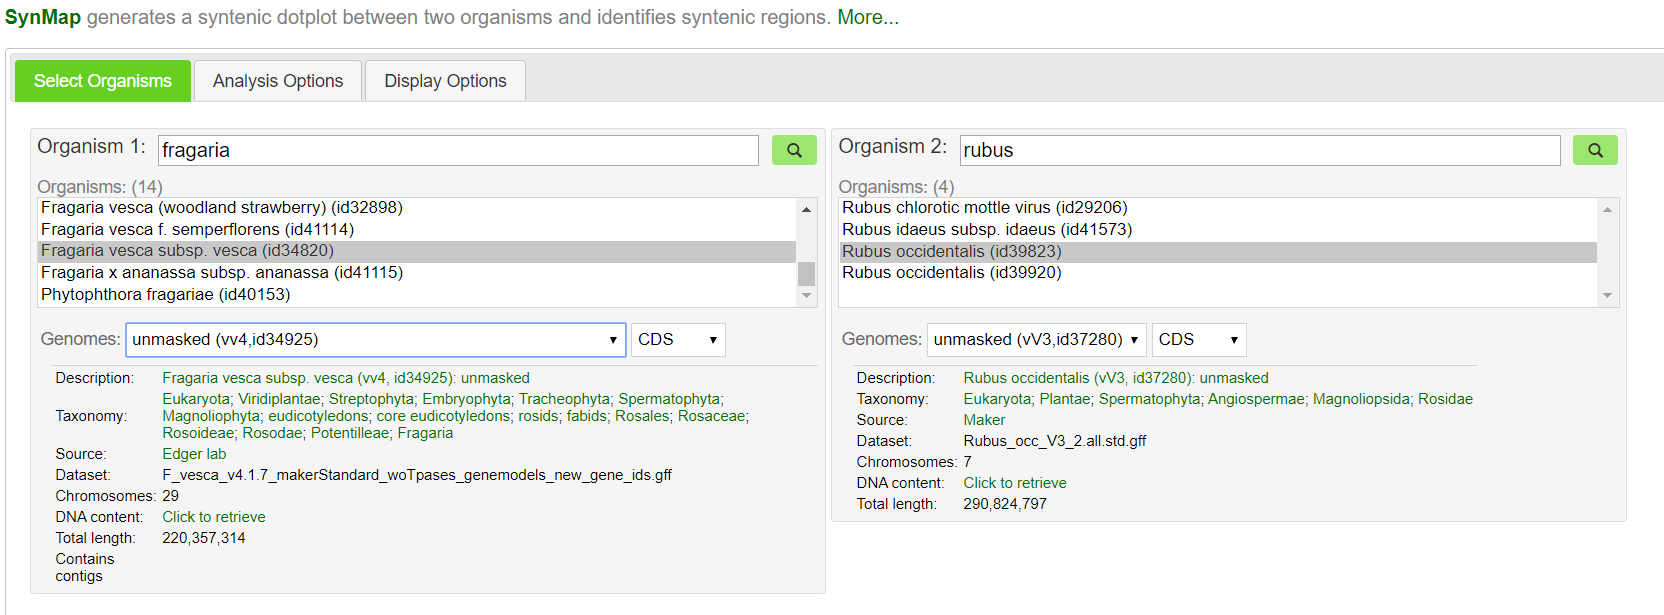
<br>
After you've chosen your species, hit Generate `SynMap`
<br>
You can scroll around the syntenic dotplot and zoom in on certain regions of interest. Once you've found a region of interest, you can compare gene level differences like so: 
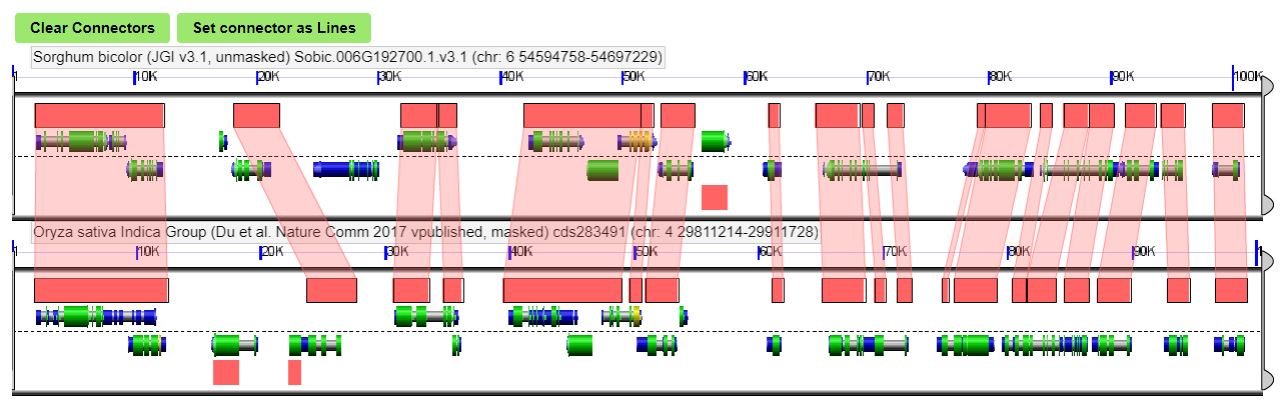
Here, conserved sequences between species are shown by red connections. 

### Which two species did you decide to compare? How similar are their genomes? 

In [ ]:
##Answer
##
##

## Orthology and Gene Family Analysis

Synteny is a good way to identify orthologous genes between species, but sometimes genes move around the genome, and when they are in new places, syntenic approaches are unable to identify orthologous gene pairs. Very distantly related species like rice and moss also have undergone massive strucutral rearrangements and polyploidy, so many of the genes are no longer in the same places. Alternatively, we can cluster similar groups of genes into gene families or **orthogroups**. Here, we essentially use BLAST and set a threshold to group genes together based on similarity. Orthogroup analysis is a powerful way to identify corresponding genes across dozens of different species. This can be used to assign function or to identify gene losses or expansions related to important traits. 
<br>
We will use OrthoFinder to compare the gene content of 21 diverse land plant lineages:
https://github.com/davidemms/OrthoFinder
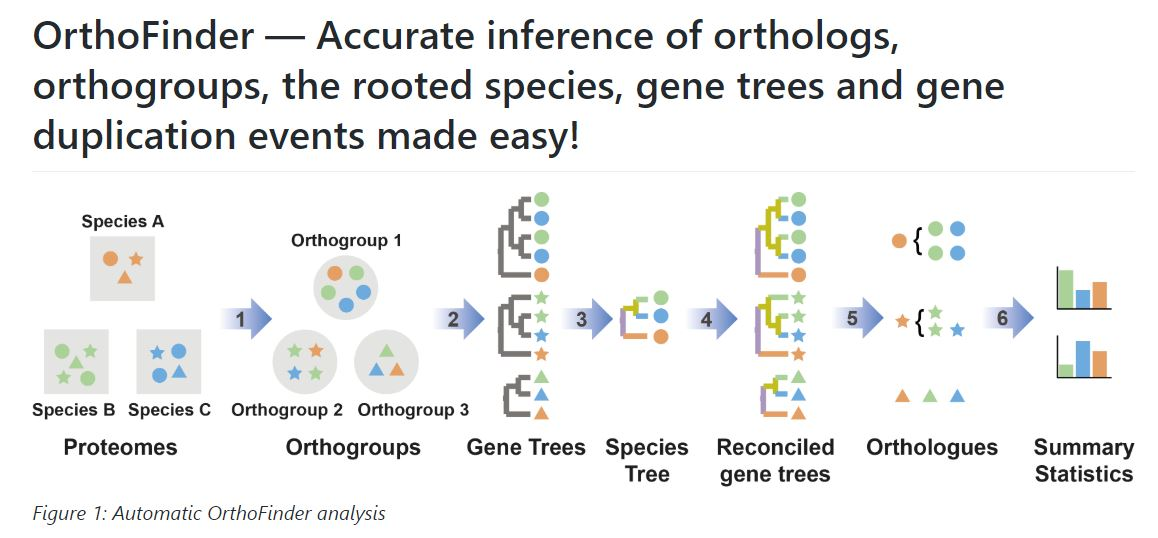

OrthoFinder can be used to cluster genes into orthogroups for any number of species and typcially, more species = more power. The input for OrthoFinder is a set of protein sequences in fasta format for each species. OrthoFinder is computationally intensive (All vs all alignment + phylogenetic tree construction), so we (and more specifically, my PhD student Jeremy Pardo) ran this already on a set of 21 species (see below). I have provided an example submission script on HPCC if you'd like to run it yourself!

### Bonus: Run OrthoFinder on your favorite species!

In [ ]:
## Answer

We will use the output files for the remainder of this exercise. 

## Phylogenetics with Bio.Phylo

Orthofinder builds a consensus phylogenetic tree based on all of the individual gene trees it constructs for each orthogroup. We can visualize this tree using the Biopython function `Phylo`. This will give us a sense of the phylogenetic placement of the species we included. First, we need to import a few functions in Biopython as well as matplotlib: 

In [1]:
import copy
from io import StringIO

from Bio import Phylo
from Bio.Phylo.Applications import PhymlCommandline
from Bio.Phylo.PAML import codeml
from Bio.Phylo.PhyloXML import Phylogeny
%matplotlib inline

There are more powerful things that can be done with `Phylo` , but for now, we will simply read the tree file output from OrthoFinder and plot it: 

In [2]:
tree = Phylo.read("data/SpeciesTree_rooted_node_labels.txt", "newick") ## specify the location of the tree file and the format (in this case, newick)

Printing the tree object as a string gives us a look at the entire object hierarchy.

In [3]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(name='N0')
        Clade(branch_length=0.0288474, name='N1')
            Clade(branch_length=0.338603, name='M_polymorpha')
            Clade(branch_length=0.34032, name='P_patens')
        Clade(branch_length=0.0288474, name='N2')
            Clade(branch_length=0.10958, name='N3')
                Clade(branch_length=0.223498, name='S_moellendorffii')
                Clade(branch_length=0.308232, name='S_lepidophylla')
            Clade(branch_length=0.147061, name='N4')
                Clade(branch_length=0.0411469, name='N5')
                    Clade(branch_length=0.229841, name='A_thaliana')
                    Clade(branch_length=0.0187217, name='N7')
                        Clade(branch_length=0.0292103, name='N9')
                            Clade(branch_length=0.184549, name='S_lycopersicum')
                            Clade(branch_length=0.163582, name='N12')
                                Clade(branch_length=0.0879242, name='L_subra

The Tree object contains global information about the tree, such as whether it’s rooted or unrooted. It has one root clade, and under that, it’s nested lists of clades all the way down to the tips.

It's hard to draw meaning from this, but we can draw the tree in a more informative way. The function draw_ascii creates a simple ASCII-art (plain text) dendrogram. This is a convenient visualization for interactive exploration, in case better graphical tools aren’t available.

In [4]:
Phylo.draw_ascii(tree)

    __________________________________ M_polymorpha
  _|
 | |___________________________________ P_patens
 |
 |              ______________________ S_moellendorffii
_|  ___________|
 | |           |_______________________________ S_lepidophylla
 | |
 | |                    _______________________ A_thaliana
 | |                   |
 |_|                   |     __________________ S_lycopersicum
   |                ___|  __|
   |               |   | |  |                 ________ L_subracemosa
   |               |   | |  |________________|
   |               |   |_|                   |_________ L_brevidens
   |               |     |
   |_______________|     |  __________________ V_vinifera
                   |     |_|
                   |       |____________________ M_truncatula
                   |
                   |   ____________________________ Z_marina
                   |  |
                   |__|   __________________________ X_viscosa
                      |  |
                 

Here we can see we constructed OrthoGroups for 17 flowering plants (11 monocot, 6 eudicots) 2 lycophytes, and 2 bryopytes. See if you can figure out which species are which and read the tree correctly. 

You can also create a slightly nicer graphic using the draw function:

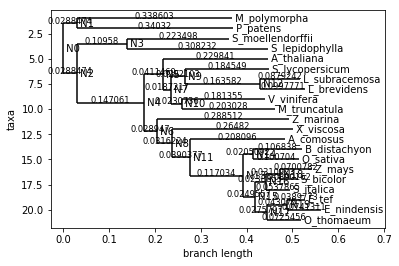

In [5]:
Phylo.draw(tree, branch_labels=lambda c: c.branch_length)

Now that we have a good sense of the phylogenetic placement of our species, we can play around with the OrthoFinder results. The primary output of OrthoFinder is a csv file where each row is a different orthogroup and each column is a different species  The numbers correspond to the number of genes in that orthogroup for each species. We can use this to get simple metrics on or more complex dynamics of expansion and contraction in specific lineages. 

For simplicity, we will use `pandas` to read out dataframe: 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data/Orthogroups.GeneCount.csv")
data.head()

,Unnamed: 0,A_comosus,A_thaliana,B_distachyon,E_nindensis,E_tef,L_brevidens,L_subracemosa,M_polymorpha,M_truncatula,...,S_bicolor,S_italica,S_lepidophylla,S_lycopersicum,S_moellendorffii,V_vinifera,X_viscosa,Z_marina,Z_mays,Total
0,OG0000000,69,113,106,321,231,160,198,18,168,...,139,151,33,133,40,69,146,77,179,2646
1,OG0000001,80,90,93,234,176,120,147,8,107,...,96,99,26,95,20,90,113,66,142,2001
2,OG0000002,56,80,114,245,172,31,44,7,119,...,122,116,22,74,39,32,82,58,120,1748
3,OG0000003,22,36,29,92,66,45,56,1,38,...,30,34,7,34,15,22,36,26,48,714
4,OG0000004,20,40,32,83,69,39,48,2,35,...,37,33,7,26,8,28,36,26,40,685


### How many total orthogroups are there for this dataset?

In [3]:
## Answer
data.tail()

,Unnamed: 0,A_comosus,A_thaliana,B_distachyon,E_nindensis,E_tef,L_brevidens,L_subracemosa,M_polymorpha,M_truncatula,...,S_bicolor,S_italica,S_lepidophylla,S_lycopersicum,S_moellendorffii,V_vinifera,X_viscosa,Z_marina,Z_mays,Total
28025,OG0028025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
28026,OG0028026,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
28027,OG0028027,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
28028,OG0028028,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
28029,OG0028029,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


### Which species has the most genes in orthogroups? 

In [44]:
#data.apply(pd.value_counts)
data.sum(axis = 0, skipna = True)

Unnamed: 0          OG0000000OG0000001OG0000002OG0000003OG0000004O...
A_comosus                                                       21942
A_thaliana                                                      23472
B_distachyon                                                    27678
E_nindensis                                                     85987
E_tef                                                           60239
L_brevidens                                                     24107
L_subracemosa                                                   28876
M_polymorpha                                                    12565
M_truncatula                                                    33927
O_sativa                                                        28553
O_thomaeum                                                      26489
P_patens                                                        19870
S_bicolor                                                       28648
S_italica           

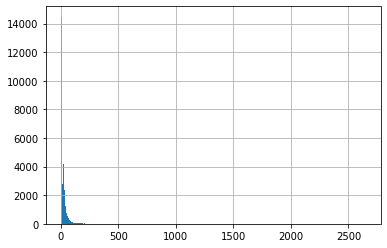

In [6]:
## Answer
data['Total'].hist(bins=300)

### Which orthogroup has the most genes in it (across all species)?

In [17]:
## Answer
#data['Total'].value_counts()
data_flat = data.values.flatten()
print(data_flat)

['OG0000000' 69 113 ... 0 2 2]


### Which species has the most orthogroups with 0 genes? Why do you think that is? 

In [ ]:
## Answer

### BONUS: Plot the distribution of orthogroup size 

In [ ]:
## Answer

### BONUS 2X: Identify orthogroups that are expanded in one species of your choice. This can be simply based on some cutoff, or preferably, using a statistical test. 

In [ ]:
## Answer